First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
Columns with missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Optimized Model Summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type

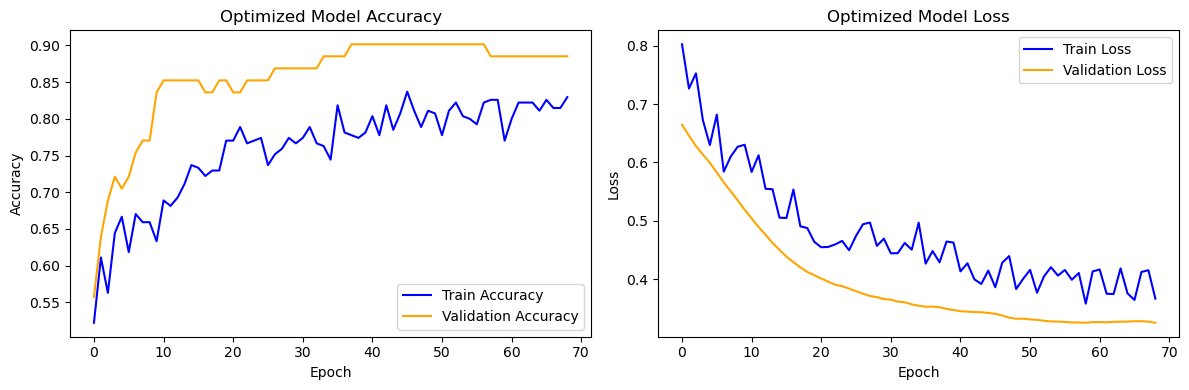

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('cleveland_heart_disease_data.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric data types
df = df.apply(pd.to_numeric)

# Identify columns with missing values
print("Columns with missing values:")
print(df.isnull().sum())

# Impute missing values with median
df.fillna(df.median(), inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Convert the target variable to binary (0: no disease, 1: disease)
y = y.apply(lambda x: 1 if x > 0 else 0)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Address class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Build the optimized DNN model
# Example: Adding Batch Normalization and Adjusting Dropout Rates
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print("\nOptimized Model Summary:")
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_resampled, epochs=100, batch_size=16,
                    validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nOptimized Test accuracy: {test_accuracy:.2f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Optimized Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Optimized Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


|   iter    |  target   | dropou... | learn_... |  neurons  |
-------------------------------------------------------------


| 1         | 0.84      | 0.1873    | 0.0009512 | 204.5     |


| 2         | 0.84      | 0.2993    | 0.0001645 | 93.95     |


| 3         | 0.88      | 0.02904   | 0.0008675 | 179.4     |


| 4         | 0.88      | 0.354     | 3.038e-05 | 250.2     |


| 5         | 0.88      | 0.4162    | 0.0002202 | 98.91     |


| 6         | 0.88      | 0.02121   | 0.0002727 | 179.5     |


| 7         | 0.88      | 0.3738    | 0.0005269 | 103.3     |


| 8         | 0.8       | 0.05086   | 1.136e-05 | 244.0     |


| 9         | 0.88      | 0.4905    | 0.0008682 | 254.9     |


| 10        | 0.84      | 0.01148   | 0.0009027 | 110.5     |


| 11        | 0.84      | 0.05098   | 0.0004094 | 171.9     |


| 12        | 0.84      | 0.4192    | 0.0002034 | 186.4     |


| 13        | 0.84      | 0.334     | 0.0003933 | 64.06     |


| 14        | 0.92      | 0.4771    | 7.691e-05 | 141.2     |


| 15        | 0.92      | 0.4385    | 0.0002081 | 144.3     |

Best Hyperparameters:
Neurons: 141
Learning Rate: 7.691202272156206e-05
Dropout Rate: 0.4771475277209075
Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 0.8007 - accuracy: 0.4957 - val_loss: 0.6470 - val_accuracy: 0.6800 - lr: 7.6912e-05
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8008 - accuracy: 0.5427 - val_loss: 0.6336 - val_accuracy: 0.7600 - lr: 7.6912e-05
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7197 - accuracy: 0.6111 - val_loss: 0.6179 - val_accuracy: 0.7600 - lr: 7.6912e-05
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.5470 - val_loss: 0.6021 - val_accuracy: 0.8000 - lr: 7.6912e-05
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.6111 - val_loss: 0.5895 - val_accuracy: 0.8000 - lr: 7.6912e-05
Epoch 6/100
15/15 [=======================

2/2 [==============================] - 0s 932us/step
ROC-AUC Score: 0.95
Optimal Threshold: 0.67
Accuracy with Optimal Threshold: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.92      0.86      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



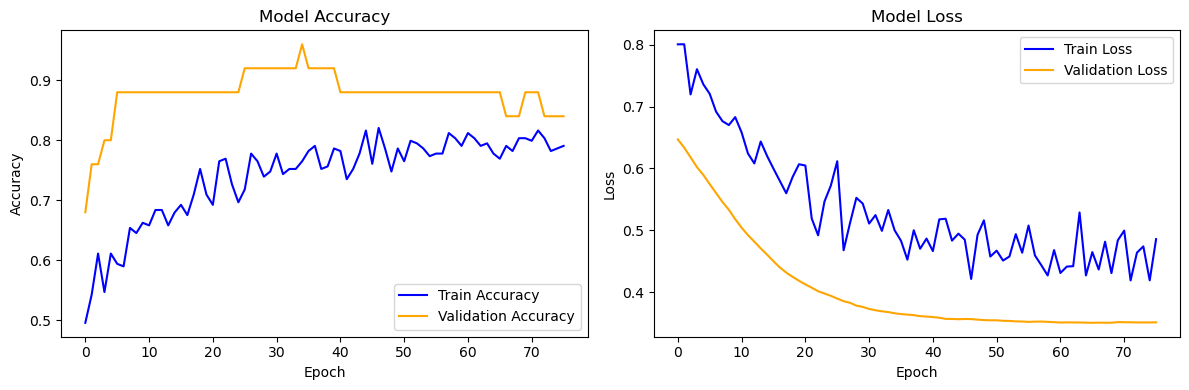

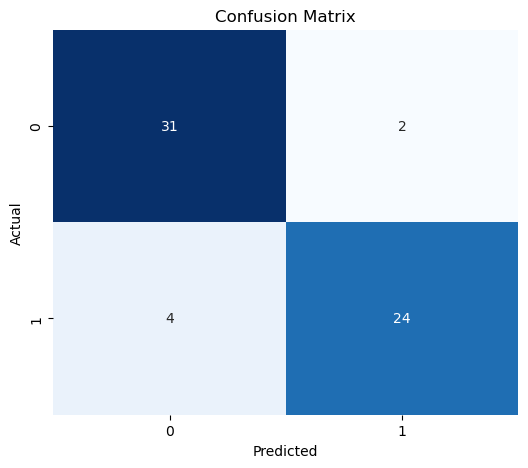


Misclassified Samples:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
271   66    1   4       160   228    0        2      138      0      2.3   
168   35    1   4       126   282    0        2      156      1      0.0   
66    60    1   3       140   185    0        2      155      0      3.0   
92    62    1   3       130   231    0        0      146      0      1.8   
172   59    0   4       174   249    0        0      143      1      0.0   
243   61    1   1       134   234    0        0      145      0      2.6   

     slope   ca  thal  
271      1  0.0   6.0  
168      1  0.0   7.0  
66       2  0.0   3.0  
92       2  3.0   7.0  
172      2  0.0   3.0  
243      2  2.0   3.0  


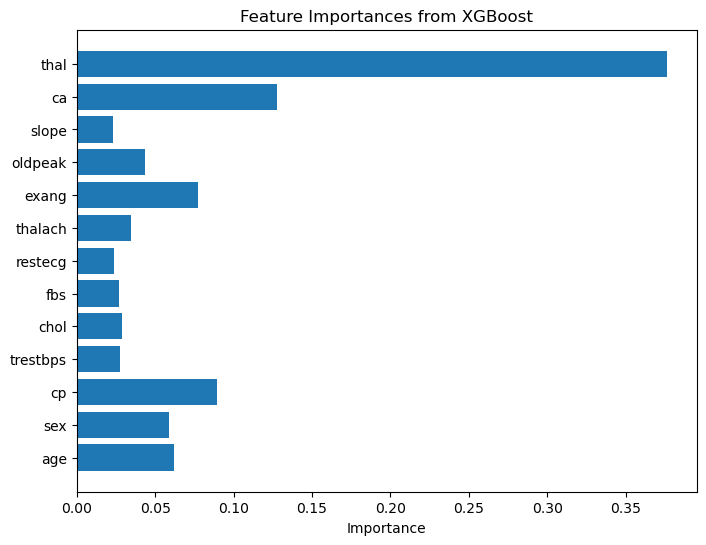

AttributeError: 'Sequential' object has no attribute 'compiled'

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and feature engineering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.utils import class_weight
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
)

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

# Deep learning models
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

# Import KerasClassifier from scikeras
from scikeras.wrappers import KerasClassifier

# Hyperparameter optimization
from bayes_opt import BayesianOptimization

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset from the CSV file
df = pd.read_csv('cleveland_heart_disease_data.csv')

# [Rest of your code remains the same...]

# Function to create the neural network model
def create_model(neurons=128, learn_rate=0.0001, dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Dense(int(neurons), input_shape=(X_train_selected.shape[1],)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(int(neurons / 2)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = optimizers.Adam(learning_rate=learn_rate)
    model.compile(
        optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']
    )
    return model

# [Rest of your code remains the same...]


# Hyperparameter tuning with Bayesian Optimization
def nn_cl_bo(neurons, learn_rate, dropout_rate):
    neurons = int(neurons)
    dropout_rate = max(min(dropout_rate, 0.9), 0.0)  # Ensure dropout_rate is between 0 and 0.9
    model = create_model(neurons=neurons, learn_rate=learn_rate, dropout_rate=dropout_rate)
    history = model.fit(
        X_train_selected, y_train_resampled,
        validation_data=(X_val_selected, y_val),
        epochs=50, batch_size=16, verbose=0
    )
    val_acc = max(history.history['val_accuracy'])
    return val_acc

# Define parameter bounds for Bayesian Optimization
pbounds = {
    'neurons': (64, 256),
    'learn_rate': (1e-5, 1e-3),
    'dropout_rate': (0.0, 0.5)
}

# Run Bayesian Optimization
optimizer_bo = BayesianOptimization(
    f=nn_cl_bo,
    pbounds=pbounds,
    random_state=42,
)
optimizer_bo.maximize(init_points=5, n_iter=10)

# Get best parameters
best_params = optimizer_bo.max['params']
best_neurons = int(best_params['neurons'])
best_learn_rate = best_params['learn_rate']
best_dropout_rate = best_params['dropout_rate']

print("\nBest Hyperparameters:")
print(f"Neurons: {best_neurons}")
print(f"Learning Rate: {best_learn_rate}")
print(f"Dropout Rate: {best_dropout_rate}")

# Build the final optimized model
model = create_model(
    neurons=best_neurons,
    learn_rate=best_learn_rate,
    dropout_rate=best_dropout_rate
)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1
)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train_resampled), y=y_train_resampled
)
class_weights = dict(enumerate(class_weights))

# Train the model
history = model.fit(
    X_train_selected, y_train_resampled,
    validation_data=(X_val_selected, y_val),
    epochs=100, batch_size=16,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights,
    verbose=1
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test)
print(f'\nTest accuracy: {test_accuracy:.2f}')

# Predict probabilities
y_probs = model.predict(X_test_selected).ravel()

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * precision * recall / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Optimal Threshold: {best_threshold:.2f}')

# Predict with optimal threshold
y_pred_optimal = (y_probs >= best_threshold).astype(int)
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)
print(f'Accuracy with Optimal Threshold: {optimal_accuracy:.2f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_optimal))

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Misclassified samples
misclassified_indices = np.where(y_pred_optimal != y_test)[0]
misclassified_samples = X_test.iloc[misclassified_indices]
print("\nMisclassified Samples:")
print(misclassified_samples)

# Feature importance using XGBoost
# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
importances = xgb_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost')
plt.show()

# Ensemble Methods

# Wrap the Keras model for scikit-learn
def create_ensemble_model():
    return create_model(
        neurons=best_neurons,
        learn_rate=best_learn_rate,
        dropout_rate=best_dropout_rate
    )

nn_model = KerasClassifier(
    build_fn=create_ensemble_model,
    epochs=50, batch_size=16, verbose=0
)

# Other classifiers
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the Voting Classifier ensemble
ensemble = VotingClassifier(estimators=[
    ('nn', nn_model),
    ('knn', knn),
    ('rf', rf)
], voting='soft')

# Train the ensemble
ensemble.fit(X_train_selected, y_train_resampled)

# Evaluate on test data
ensemble_accuracy = ensemble.score(X_test_selected, y_test)
print(f'\nEnsemble Test accuracy: {ensemble_accuracy:.2f}')

# Stacking Classifier
# Define base models
base_models = [
    ('nn', nn_model),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking ensemble
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking.fit(X_train_selected, y_train_resampled)

# Evaluate on test data
stacking_accuracy = stacking.score(X_test_selected, y_test)
print(f'\nStacking Ensemble Test accuracy: {stacking_accuracy:.2f}')

# Cross-Validation
# Evaluate using cross-validation
cv_scores = cross_val_score(nn_model, X[selected_features], y, cv=5, scoring='accuracy')
print(f'\nCross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores):.2f}')

# Final Remarks
print("\nFinal Remarks:")
print("By incorporating advanced preprocessing, feature engineering, hyperparameter tuning, ensemble methods, and thorough evaluation, we've built a comprehensive model pipeline.")
print("Remember that achieving very high accuracy on small or limited datasets can be challenging due to inherent data limitations.")
print("Focus on understanding the model's predictions, errors, and the practical implications of its performance.")
